In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=####Fill###,
                                          shuffle=True, num_workers=2)

100%|██████████| 170498071/170498071 [00:12<00:00, 13738305.97it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [4]:
valset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
val_loader = torch.utils.data.DataLoader(valset, batch_size=####Fill###,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

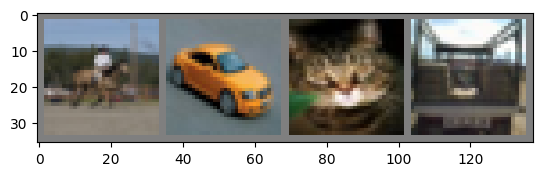

tensor(7) tensor(1) tensor(3) tensor(9)


In [7]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % labels[j] for j in range(4)))
#classes = 'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [46]:
class Mymodel(nn.Module):
    def __init__(self):
        super().__init__()
        #make network

    def forward(self, x):
        #class 10, return must be shape (B, 10)
        return x


In [47]:
model = Mymodel()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

Mymodel(
  (fc1): Linear(in_features=3072, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=10, bias=True)
)

In [48]:
import torch.optim as optim

In [49]:
EPOCH = ####Fill###
lr = ####Fill###
criterion = nn.CrossEntropyLoss()
optimizer = ####Fill###
scheduler = ####Fill###

In [50]:
train_loss_history = []
val_loss_history = []
for epoch in range(EPOCH):
    train_loss = 0
    val_loss = 0
    total = 0
    correct = 0
    for i, data in enumerate(train_loader):
        x, y = data
        x = x.reshape(-1, 32*32*3) # flatten
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad() #gradient 초기화

        y_pred = model(x)

        loss = criterion(y_pred, y)

        loss.backward() #backpropagation
        optimizer.step() #update

        train_loss += loss.item()
    scheduler.step() #scheduler 사용 안 하면 주석 처리
    train_loss/=len(train_loader)
    train_loss_history.append(train_loss)

    with torch.no_grad(): # val set 학습을 꺼둠
        for i, data in enumerate(val_loader):
            x, y = data
            x = x.reshape(-1, 32*32*3) # flatten
            x = x.to(device)
            y = y.to(device)

            output = model(x)
            loss = criterion(output, y)

            val_loss += loss.item()


            _, pred = torch.max(output.data, 1)
            total += y.size(0)
            correct += (pred == y).sum().item()
    val_loss /= len(val_loader)
    val_loss_history.append(val_loss)
    val_acc = 100 * correct / total

    print(f"epoch {epoch + 1} train loss {train_loss:.3f} val loss {val_loss:.3f}")
    print(f"val acc {val_acc:.3f}%\n\n")


epoch 0 train loss 1.880 val loss 1.736
val acc 37.630
epoch 1 train loss 1.707 val loss 1.646
val acc 41.370
epoch 2 train loss 1.562 val loss 1.556
val acc 44.890
epoch 3 train loss 1.420 val loss 1.455
val acc 48.970
epoch 4 train loss 1.288 val loss 1.402
val acc 50.960
epoch 5 train loss 1.216 val loss 1.395
val acc 51.160
epoch 6 train loss 1.226 val loss 1.398
val acc 50.900
epoch 7 train loss 1.290 val loss 1.427
val acc 51.100
epoch 8 train loss 1.362 val loss 1.453
val acc 49.110
epoch 9 train loss 1.414 val loss 1.523
val acc 46.570


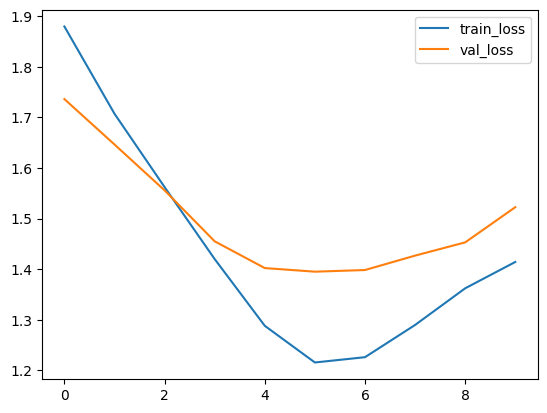

In [52]:
plt.plot(np.arange(EPOCH), train_loss_history, label='train_loss')
plt.plot(np.arange(EPOCH), val_loss_history, label='val_loss')
plt.legend()
plt.show()